# Project 3.  Due October 31

In [29]:
import sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy.linalg as LA

### The attached file, 'polluteddata.csv', contains the following data.
### We took intraday price values for an asset; this time series was then split into half-hour intervals for a total of 1709 intervals

In [30]:
data = pd.read_csv('polluteddata.csv',header=None)
polluteddata = data.to_numpy()

In [31]:
data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,-3.00,-8.26,-10.55,-8.56,-18.08,-12.67,-14.29,-16.08,...,-27.58,-31.51,-27.53,-25.24,-25.32,-24.44,-28.04,-30.94,-29.57,-27.56
1,1.0,0.0,0.12,-0.41,-2.56,0.15,-1.65,-5.14,-5.09,-8.06,...,-6.65,-5.43,-6.13,-3.42,-4.48,-4.85,-4.47,-4.68,-2.10,-0.28
2,2.0,0.0,-2.80,-3.46,-5.80,-3.86,-2.60,-5.30,-4.81,-3.30,...,-12.74,-13.02,-15.99,-14.15,-14.92,-16.80,-16.88,-19.53,-25.30,-19.60
3,3.0,0.0,-1.95,-9.58,-13.68,-13.64,-18.36,-22.33,-15.70,-16.69,...,-19.50,-17.76,-18.52,-20.12,-17.35,-14.18,-15.57,-15.42,-19.58,-17.68
4,4.0,0.0,-1.11,1.62,-0.34,-5.76,-2.53,-0.56,1.45,0.62,...,0.49,-3.04,-0.82,-8.32,-3.87,-10.33,-11.46,-8.94,-16.81,-16.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1704.0,0.0,0.38,-0.73,-3.09,-2.31,-2.46,-7.22,-5.85,-4.63,...,-23.96,-19.09,-17.55,-23.27,-20.66,-18.36,-18.05,-16.96,-21.37,-25.62
1705,1705.0,0.0,-3.21,-9.32,-2.90,-7.39,-8.25,1.42,1.40,2.22,...,4.42,4.05,1.48,-7.24,-7.92,-15.95,-18.73,-14.73,-12.64,-12.91
1706,1706.0,0.0,-0.83,1.65,2.19,1.62,0.45,0.63,4.18,4.02,...,18.51,18.66,16.63,14.55,16.01,13.66,15.52,15.37,16.70,12.52
1707,1707.0,0.0,0.34,-0.90,-2.51,-2.15,-4.72,-4.57,-7.59,-5.22,...,0.95,3.28,-0.92,0.28,-2.47,-7.22,-9.03,-10.33,-12.30,-16.24


In [32]:
data.shape

(1709, 31)

### There are 1709 lines in this file, one for each half-hour interval.  Each line begins with the count of the corresponding half-hour

In [33]:
for t in range(3): #len(polluteddata[0,:])):
    print('half-hour',t, 'data:',polluteddata[t,1:])

half-hour 0 data: [  0.    -3.    -8.26 -10.55  -8.56 -18.08 -12.67 -14.29 -16.08 -20.04
 -15.81 -14.56 -17.34 -20.14 -15.96 -14.3  -15.82 -15.07 -12.39 -20.65
 -27.58 -31.51 -27.53 -25.24 -25.32 -24.44 -28.04 -30.94 -29.57 -27.56]
half-hour 1 data: [  0.     0.12  -0.41  -2.56   0.15  -1.65  -5.14  -5.09  -8.06  -9.05
 -14.9  -18.27 -16.18 -15.42 -13.8  -12.89 -12.87 -10.18 -12.7   -9.21
  -6.65  -5.43  -6.13  -3.42  -4.48  -4.85  -4.47  -4.68  -2.1   -0.28]
half-hour 2 data: [  0.    -2.8   -3.46  -5.8   -3.86  -2.6   -5.3   -4.81  -3.3   -0.28
   1.33   0.68   2.3    1.65  -9.32 -11.74 -11.49 -19.37 -11.8  -10.87
 -12.74 -13.02 -15.99 -14.15 -14.92 -16.8  -16.88 -19.53 -25.3  -19.6 ]


### The data was constructed as follows for each half hour interval $t$.  Suppose that $p(t, k)$ denotes the price of the asset in minute $k$ of half-hour $t$.  Here $k = 0,1,\ldots, 29$.  
### The data in position $k+1$ of line $t$ of the file equals $p(t,k) - p(t,0)$, i.e. the change in price between minute $k$ and minute $0$.

### EXCEPT that:
### The data was <font color = "red">polluted</font> in a <font color = "red">significant and correlated</font> manner during a certain <font color = "red"> interval $[t_1, t_2]$ </font> of half-hours.
### Your task is to identify this interval $[t_1, t_2]$ as closely as possible, using <font color = "red">covariance analysis techniques</font>.
### Please use power method if you want to find the largest eigenvalue and its corresponding eigenvector for certain matrices.
### Please note that we are not interested in small, random noise.  We are looking for a large change in the covariance structure.

In [34]:
data = data.drop(columns=0) #drop the first column because it's ID
data

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.0,-3.00,-8.26,-10.55,-8.56,-18.08,-12.67,-14.29,-16.08,-20.04,...,-27.58,-31.51,-27.53,-25.24,-25.32,-24.44,-28.04,-30.94,-29.57,-27.56
1,0.0,0.12,-0.41,-2.56,0.15,-1.65,-5.14,-5.09,-8.06,-9.05,...,-6.65,-5.43,-6.13,-3.42,-4.48,-4.85,-4.47,-4.68,-2.10,-0.28
2,0.0,-2.80,-3.46,-5.80,-3.86,-2.60,-5.30,-4.81,-3.30,-0.28,...,-12.74,-13.02,-15.99,-14.15,-14.92,-16.80,-16.88,-19.53,-25.30,-19.60
3,0.0,-1.95,-9.58,-13.68,-13.64,-18.36,-22.33,-15.70,-16.69,-19.78,...,-19.50,-17.76,-18.52,-20.12,-17.35,-14.18,-15.57,-15.42,-19.58,-17.68
4,0.0,-1.11,1.62,-0.34,-5.76,-2.53,-0.56,1.45,0.62,-2.33,...,0.49,-3.04,-0.82,-8.32,-3.87,-10.33,-11.46,-8.94,-16.81,-16.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,0.0,0.38,-0.73,-3.09,-2.31,-2.46,-7.22,-5.85,-4.63,-5.82,...,-23.96,-19.09,-17.55,-23.27,-20.66,-18.36,-18.05,-16.96,-21.37,-25.62
1705,0.0,-3.21,-9.32,-2.90,-7.39,-8.25,1.42,1.40,2.22,1.58,...,4.42,4.05,1.48,-7.24,-7.92,-15.95,-18.73,-14.73,-12.64,-12.91
1706,0.0,-0.83,1.65,2.19,1.62,0.45,0.63,4.18,4.02,5.08,...,18.51,18.66,16.63,14.55,16.01,13.66,15.52,15.37,16.70,12.52
1707,0.0,0.34,-0.90,-2.51,-2.15,-4.72,-4.57,-7.59,-5.22,-5.65,...,0.95,3.28,-0.92,0.28,-2.47,-7.22,-9.03,-10.33,-12.30,-16.24


In [35]:
# Stage 1 Check the stationarity
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def check_stationarity(df, alpha=0.05):
    results = []
    for col in df.columns[1:]:
        series = df.loc[:,col]
        adf_result = adfuller(series)
        p_value = adf_result[1]
        stationary = p_value < alpha
        results.append({
            "feature": col,
            "p_value": p_value,
            "stationary": stationary
        })
    return pd.DataFrame(results)

check_stationarity(data)
#All columns (except the first column because it's all zero and we can't discuss its stationarity) are stationary, can proceed! 

,feature,p_value,stationary
0,2,0.000000e+00,True
1,3,2.316649e-12,True
2,4,1.869088e-10,True
3,5,0.000000e+00,True
4,6,4.922298e-30,True
5,7,0.000000e+00,True
6,8,7.023276e-14,True
7,9,8.028274e-18,True
8,10,8.635674e-26,True
9,11,1.162575e-26,True


In [36]:
def power_method(A, tol=1e-8, max_iter=1000):
    """Power Method to compute largest eigenvalue of symmetric matrix A."""
    n = A.shape[0]
    v = np.random.randn(n)
    v /= np.linalg.norm(v)
    last_val = 0
    for _ in range(max_iter):
        v_new = A @ v
        v_new /= np.linalg.norm(v_new)
        val = v_new.T @ A @ v_new
        res = np.linalg.norm(A @ v_new - val * v_new) / (abs(val) + 1e-15)
        if res < tol:
            return val, v_new, True
    
        v = v_new
    return val, v_new, False


def covariance_power_series(X, window=5):
    """
    Compute largest eigenvalue of covariance matrix in each sliding window using Power Method.
    X: DataFrame (rows=time, cols=features)
    """
    T, K = X.shape
    lambdas = []
    for i in range(T - window + 1):
        Xw = X.iloc[i:i+window]
        Xw = Xw - Xw.mean(axis=0)
        cov = np.cov(Xw, rowvar=T)
        lam, _, converged = power_method(cov)
        lambdas.append(lam)
    return np.array(lambdas)

def detect_cov_change(X, window=5, rel_thresh=0.3):
    """
    Detect where covariance structure changes based on large eigenvalue change.
    Returns:
      - lambdas: array of largest eigenvalues per window
      - change_points: list of indices where relative change > threshold
      - strongest_change: tuple (t1, t2, delta)
    """
    lambdas = covariance_power_series(X, window)
    rel_change = np.abs(np.diff(lambdas)) / (lambdas[:-1] + 1e-12)
    
    change_points = np.where(rel_change > rel_thresh)[0]
    
    if len(change_points) == 0:
        strongest = None
    else:
        # Find largest absolute change with smallest distance
        deltas = np.abs(np.diff(lambdas))
        max_idx = np.argmax(deltas)
        strongest = (max_idx, max_idx+1, deltas[max_idx])
    
    return lambdas, rel_change, change_points, strongest

lambdas, rel_change, change_points, strongest = detect_cov_change(data, window=100, rel_thresh=0.3)

print("maximum eigenvalue λ1(t):", lambdas)
print("change rate:", rel_change)
# print("covariance structure change points", change_points)

if strongest:
    t1, t2, delta = strongest
    print(f"biggest covariance change: [{t1}, {t2}], λ change = {delta:.4f}")
else:
    print("No significant change in covariance")

maximum eigenvalue λ1(t): [1357.21722054 1313.84375749 1320.09673655 ... 2447.29467318 2439.06829864
 2432.35556294]
change rate: [0.03195764 0.0047593  0.01903952 ... 0.00626325 0.00336142 0.00275217]
biggest covariance change: [1531, 1532], λ change = 710.9485


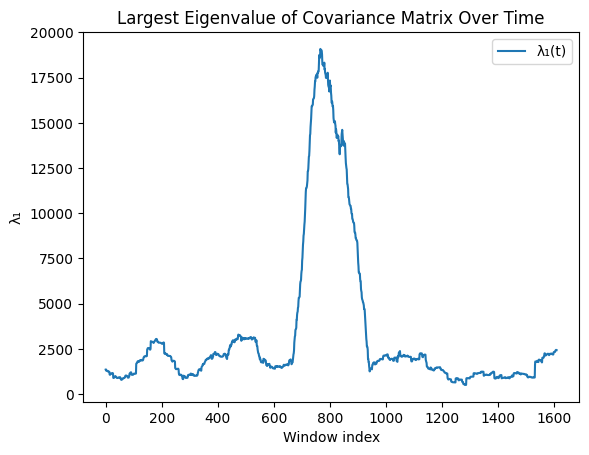

In [37]:
import matplotlib.pyplot as plt

plt.plot(lambdas, label="λ₁(t)")
plt.title("Largest Eigenvalue of Covariance Matrix Over Time")
plt.xlabel("Window index")
plt.ylabel("λ₁")
# for cp in change_points:
#     plt.axvline(cp, color='r', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

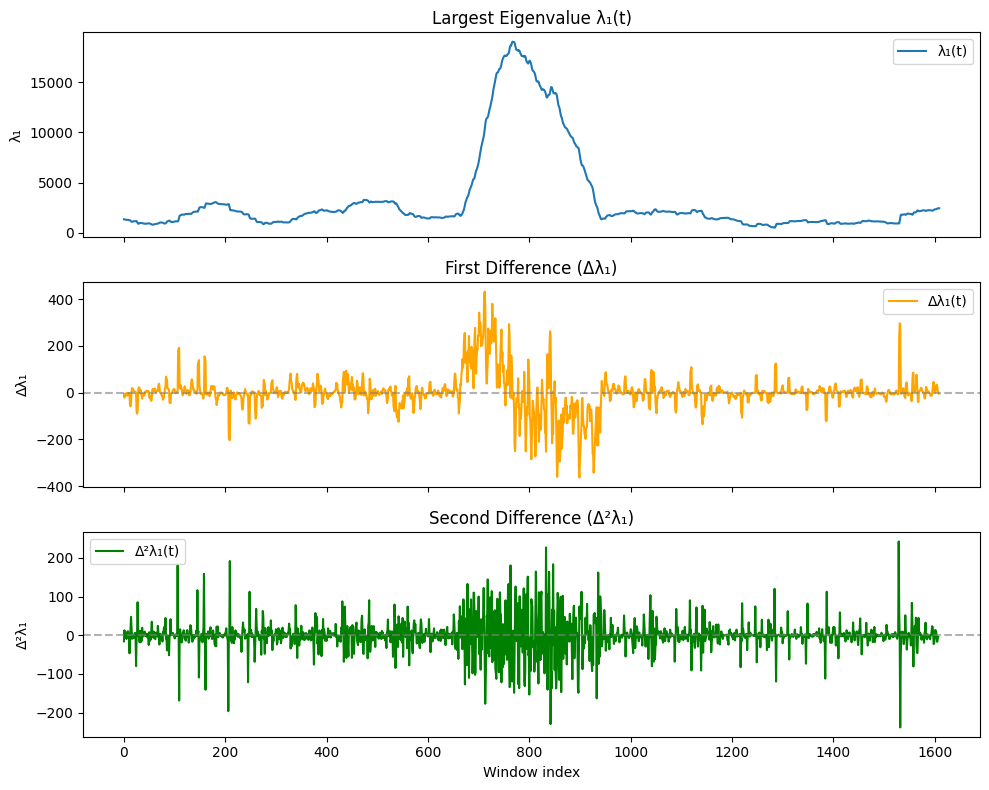

[ -5.14458415 -20.75149605  -7.88317842 ...   9.26172104   0.0978378
  -3.86091413]


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_eigen_differences(lambdas, smooth=False, window=3):
    """
    First and second difference
    """
    lambdas = np.asarray(lambdas)
    if smooth:
        lambdas = pd.Series(lambdas).rolling(window, center=True, min_periods=1).mean().to_numpy()

    # First Difference
    diff1 = np.diff(lambdas)
    # Second Difference
    diff2 = np.diff(diff1)

    # Plotting
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    
    axes[0].plot(lambdas, label='λ₁(t)')
    axes[0].set_title("Largest Eigenvalue λ₁(t)")
    axes[0].set_ylabel("λ₁")
    axes[0].legend()

    axes[1].plot(diff1, color='orange', label='Δλ₁(t)')
    axes[1].axhline(0, color='gray', linestyle='--', alpha=0.6)
    axes[1].set_title("First Difference (Δλ₁)")
    axes[1].set_ylabel("Δλ₁")
    axes[1].legend()

    axes[2].plot(diff2, color='green', label='Δ²λ₁(t)')
    axes[2].axhline(0, color='gray', linestyle='--', alpha=0.6)
    axes[2].set_title("Second Difference (Δ²λ₁)")
    axes[2].set_xlabel("Window index")
    axes[2].set_ylabel("Δ²λ₁")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    return diff1

# === 示例使用 ===
print(plot_eigen_differences(lambdas, smooth=True))


In [42]:
diffs = np.diff(lambdas)

# === First 30 Consecutive lambda first difference > 0 ===
pos_start = None
count = 0
for i, d in enumerate(diffs):
    if d > 0:
        count += 1
        if count == 30:
            pos_start = i - 29  
            break
    else:
        count = 0

# === Last 30 Consecutive lambda first difference > 0 ===
neg_end = None
count = 0
for i in range(len(diffs) - 1, -1, -1):
    if diffs[i] < 0:
        count += 1
        if count == 30:
            neg_end = i 
            break
    else:
        count = 0

print("Polluted Start Point", pos_start)
print("Polluted End Point", neg_end)

Polluted Start Point 663
Polluted End Point 912
